<a href="https://colab.research.google.com/github/cjhenry10/big-data-ai/blob/main/final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import math
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# video used:
# https://www.youtube.com/watch?v=QIUxPv5PJOY&ab_channel=ComputerScience

In [20]:
# Get the stock quote
nya = yf.Ticker('^NYA')
data = nya.history(period='5y')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-19 00:00:00-04:00,12714.610352,12716.950195,12622.019531,12671.480469,3375120000,0.0,0.0
2018-04-20 00:00:00-04:00,12670.919922,12680.870117,12571.209961,12607.160156,3428260000,0.0,0.0
2018-04-23 00:00:00-04:00,12618.070312,12640.160156,12567.219727,12610.769531,3030390000,0.0,0.0
2018-04-24 00:00:00-04:00,12659.929688,12675.929688,12442.929688,12514.000000,3716020000,0.0,0.0
2018-04-25 00:00:00-04:00,12491.429688,12539.589844,12408.780273,12517.860352,3563680000,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-12 00:00:00-04:00,15520.919922,15668.360352,15485.500000,15500.929688,3633120000,0.0,0.0
2023-04-13 00:00:00-04:00,15500.929688,15650.839844,15498.940430,15630.889648,3596590000,0.0,0.0
2023-04-14 00:00:00-04:00,15630.889648,15707.809570,15531.129883,15601.780273,3575690000,0.0,0.0


In [21]:
# get the shape
data.shape

(1258, 7)

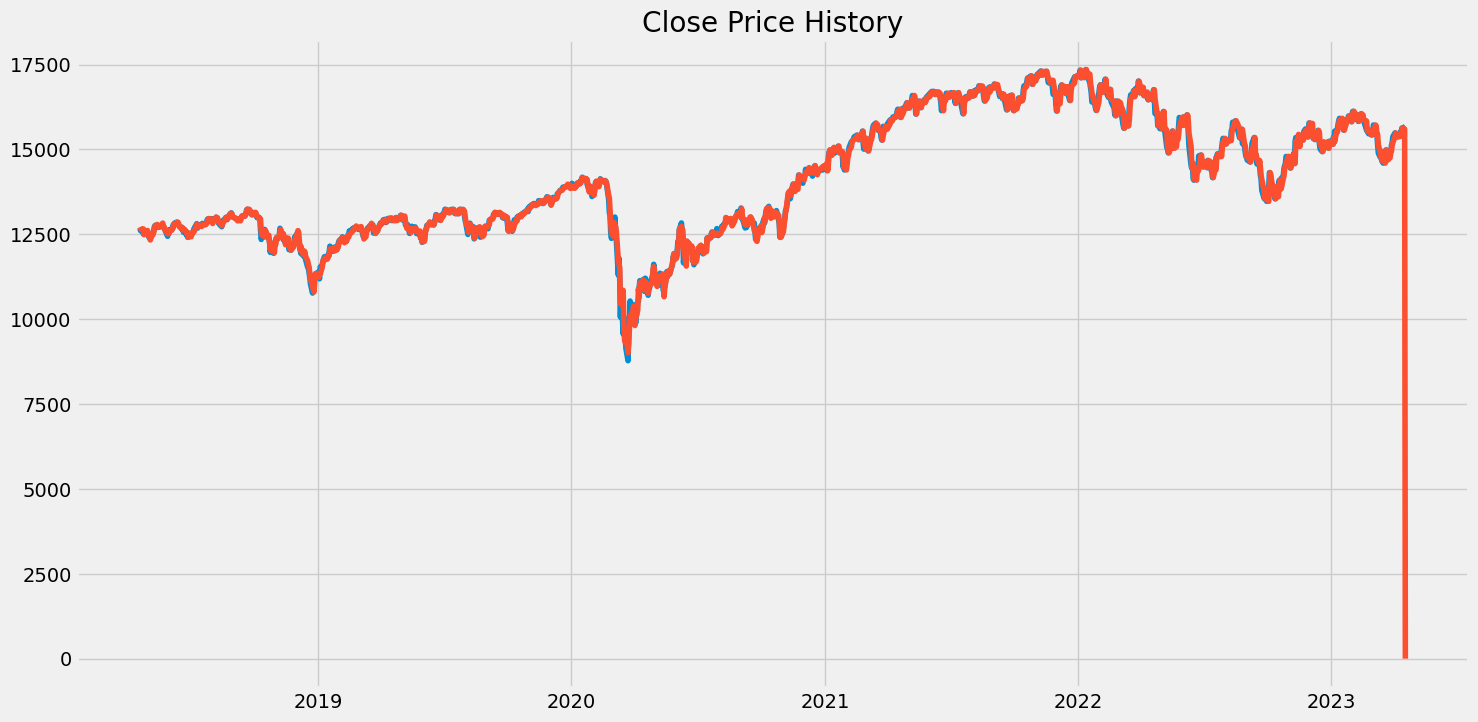

In [22]:
# viz
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data[['Close', 'Open']])

In [23]:
# new dataframe with just the open and close column
# df2 = data.filter(['Open','Close'])
df2 = data.filter(['Close'])
# convert to numpy array
dataset = df2.values

# get num rows to train model
training_data_len = math.ceil(len(dataset) * 0.8)

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
# create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
train_data
# # split the data into x_train and y_trai  n data sets
x_train = []  # independent variables / features
y_train = []  # dependent variables / features

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # # uncomment to see the data
  # if i <= 61:
  #   print(x_train)
  #   print(y_train)
  #   print()

In [24]:
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
# # reshape the data
# # model expects 3 dimensions, the dataset currently only has two
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

(947, 60)

In [25]:
# build the LSTM model
model = Sequential()
# 50 neurons, return_sequences=True because we use another layer, shape added for first layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# 50 neurons
model.add(LSTM(50, return_sequences=False))
# dense layer with 25 neurons
model.add(Dense(25))
# dense layer with 1 neuron
model.add(Dense(1))

In [26]:
# compile model
# optimizer used to improve upon the loss function, loss function measures how well model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

# train model
# batch size is number of training examples, epoch is an iteration forward and backward through a network
model.fit(x_train, y_train, batch_size=1, epochs=1)

947/947 [==============================] - 38s 36ms/step - loss: 0.0034


In [27]:
# create testing data set
# new array containing scaled values from training_data_len minus 60 to the end
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)): 
  x_test.append(test_data[i-60:i, 0])

In [28]:
# convert data to numpy array
x_test = np.array(x_test)

# reshape data to 3 dimensions for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
# get the modesl predicted price values
predictions = model.predict(x_test)
# 'unscale' values back to normal (instead of between 0 and 1)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 21ms/step


In [30]:
# get RMSE
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

7.142862145169323

<ipython-input-31-b9f22bf536c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions;


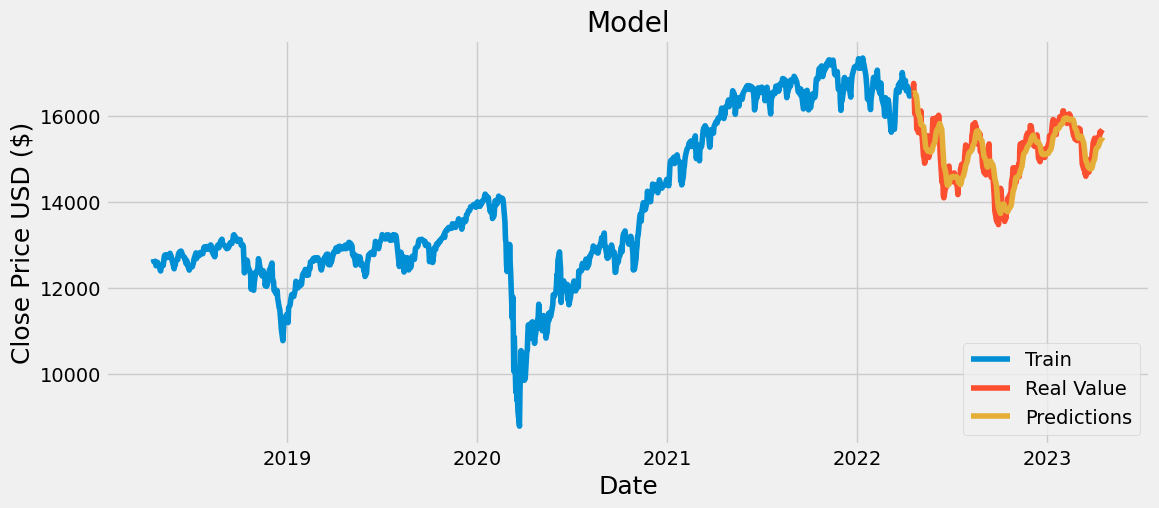

In [31]:
# plot the data
train = df2[:training_data_len]
valid = df2[training_data_len:]
valid['Predictions'] = predictions;

plt.figure(figsize=(12,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real Value', 'Predictions'], loc='lower right')
plt.show()